# Does the feature importance of variables change in a certain direction 

(when other variables are removed?) 

In [1]:
from ast import literal_eval  
import math   
import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd

import seaborn as sns
import time

from collections import defaultdict
from matplotlib.colors import to_rgb
from matplotlib.collections import PolyCollection   

In [2]:
datasetTimepoint = "12_uponAdmission"
target = "disease_severity"
#### Feature selection:
# vars = "clinical+bestSterols"    # boruta+bestSterols
# varPath = f"../../results/featureSelection/{datasetTimepoint}/{vars}.txt"
# sel_variables = pd.read_csv(varPath, header=None)[0].tolist()

# folderFigures =  f"../../figures"
# os.makedirs(folderFigures, exist_ok=True)


## Scoring

In [3]:
''' Load data'''
dataframes_before = {}
dataframes_after = {} 
dataframes_features = {} 
dataframes_importances = {}  

models = ['rfc','gpr', 'gnb', 'qda', 'mcl'] 
varSetList = ["clinical+bestSterols", "manualSelection/rmO2"]

In [4]:
df_scoring = pd.DataFrame()
for varSet in varSetList:
    print(varSet)
    for model in models:
        folder = f"../../results/prediction/featureSelection/{datasetTimepoint}/{varSet}/modelComparison/zigaPipeline"
        df = pd.read_csv(folder+f"/prediction_cv_test_{model}.csv")   
        df["varSet"] = varSet
        df_scoring = pd.concat([df_scoring, df], axis=0)

df_scoring

# df_scoring_plot = df_scoring.melt("model")
# fig, ax = plt.subplots(figsize=(10,5))
# sns.barplot(data=df_scoring_plot, x="variable", y="value", hue="model")
# ax.legend(bbox_to_anchor=(1.12, 1.02))
# ax.set_title("clinical_T1")

clinical+bestSterols
manualSelection/rmO2


FileNotFoundError: [Errno 2] No such file or directory: '../../results/prediction/featureSelection/12_uponAdmission/manualSelection/rmO2/modelComparison/zigaPipeline/prediction_cv_test_rfc.csv'

## Feature importances

In [38]:
models = ['qda'] ###  Note: only ever take one! #, 'gnb', 'qda', 'mcl'] #'svc'
varSetList = ["clinical+bestSterols", "manualSelection/rmO2"]

In [39]:
def evaluate_fi(df_importances):
    df_importances_sf = df_importances.copy()  
    df_importances_sf["n"] = np.sum(df_importances_sf.iloc[:,1:-1] > 0, axis = 1) 
    N = len(df_importances_sf.columns) - 3
    df_importances_sf["importance"] = df_importances_sf["n"]/N    
    return df_importances_sf

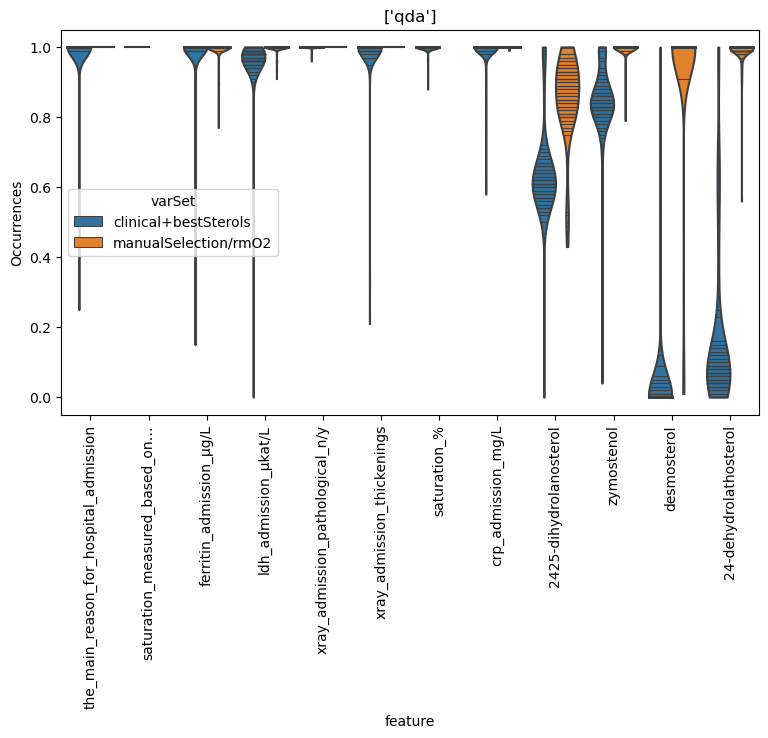

In [40]:
df_fi = pd.DataFrame()

for varSet in varSetList:
    for model in models:
        folder = f"../../results/prediction/featureSelection/{datasetTimepoint}/{varSet}/modelComparison/zigaPipeline"
        df = pd.read_csv(f"{folder}/importances_test_{model}.csv") 
        df = evaluate_fi(df)
        df["model"] = model
        df["varSet"] = varSet
        df_fi = pd.concat([df_fi, df], axis=0)

fig, axes = plt.subplots(1, 1, figsize=(9,5)) 
ax = sns.violinplot(data=df_fi, inner="stick", ax=axes, x="feature", y="importance", hue="varSet", cut=0, scale="width") #color = sns.color_palette("hls", 8)[5]     
ax.set_ylabel("Occurrences")    #axes[index]
ax.set_title(models)
ax.tick_params(axis='x', rotation=90)